# V.A Categorica

- Cada una de las N posibles salidas tiene un valor de probabilidad específico
- La forma mas usual de definirla es a través de un histograma
- Este tipo de representación se llama **no paramétrica** debido a que la V.A no queda definida con unos pocos parámetros sino que hay que definirla explicitamente

# Ejemplos

In [6]:
import numpy as np

In [7]:
# Usaremos un diccionario en python para definirla
X = {1: 0.1, 2: 0.3, 3: 0.5, 4:0.1}

In [8]:
# Verificamos que la suma sea 1
sum(X.values())

1.0

In [9]:
from matplotlib import pyplot as plt

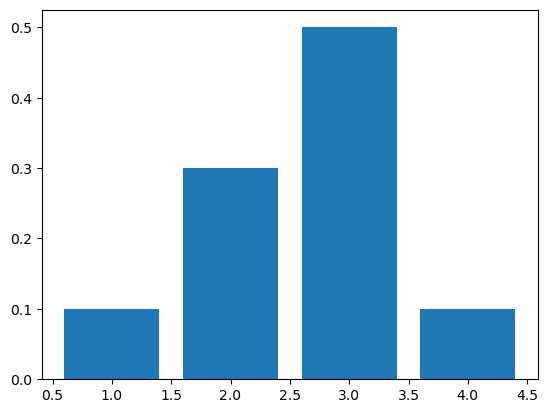

In [10]:
plt.bar(X.keys(), X.values())
plt.show()

In [11]:
np.log(4)

1.3862943611198906

## Cálculo de momentos y entropía de una V.A categórica

In [38]:
def mean(X):
    m = 0
    for x, p in X.items():
        m += x*p
    return m

In [39]:
mean(X)

2.6

In [40]:
def variance(X):
    m = mean(X)
    v = 0
    for x, p in X.items():
        v += (x-m)**2*p
    return v

In [41]:
variance(X)

0.64

In [44]:
def entropy(X, normalize = True):
    e = 0
    for _, p in X.items():
        e -= p * np.log(p)
    if normalize:
        e = e/np.log(len(X))
    else:
        e = e/np.log(2)
    return e

In [45]:
entropy(X, normalize=True)

0.8427376486136672

In [46]:
entropy(X, normalize=False)

1.6854752972273344

In [47]:
entropy(X, normalize=False)/np.log(4)

1.2158134264253635

In [17]:
entropy(X, normalize=True)/np.log(4)

0.6079067132126817

## Que idea intuitiva nos da la varianza o el desvio estandard? y la entropía?
### Cual es mejor medida para la incertidumbre?

In [50]:
def analize_VA(X, normalize=True):
    # assert sum(X.values()) == 1
    plt.bar(X.keys(), X.values())
    plt.show()
    print('Media:', mean(X))
    if normalize:
        print('Entropía normalizada:', entropy(X, normalize=normalize))
    else:
        print('Entropía:', entropy(X, normalize=normalize))
    print('Varianza:', variance(X))

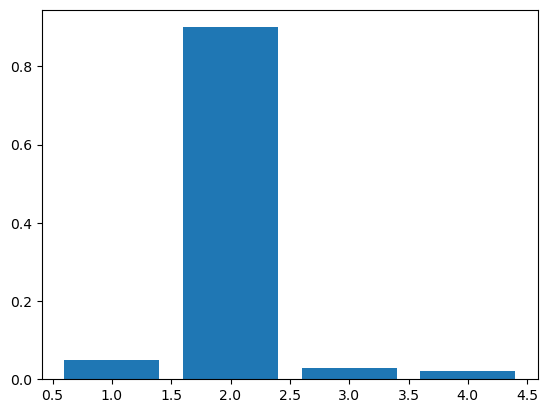

Media: 2.02
Entropía normalizada: 0.3087715616560074
Varianza: 0.15960000000000002


In [51]:
X_1 = {1: 0.05, 2: 0.9, 3: 0.03, 4:0.02}
analize_VA(X_1)

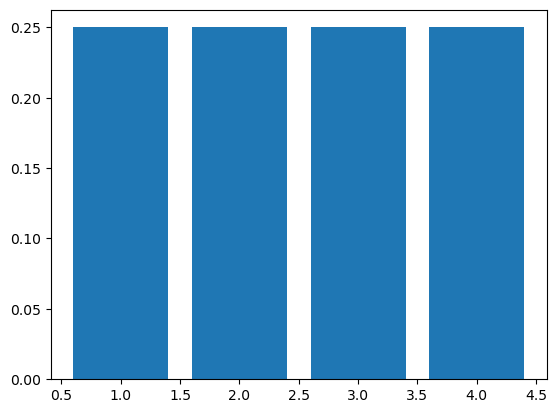

Media: 2.5
Entropía normalizada: 1.0
Varianza: 1.25


In [52]:
X_2 = {1: 0.25, 2: 0.25, 3: 0.25, 4:0.25}
analize_VA(X_2)

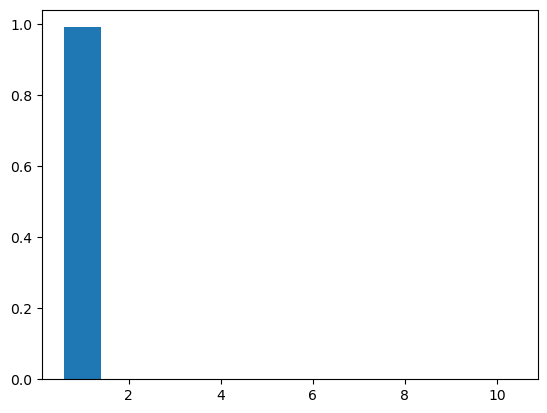

Media: 1.0449999999999997
Entropía normalizada: 0.030891008405092145
Varianza: 0.282975


In [21]:
X_3 = {1: 0.991, 2: 0.001, 3: 0.001, 4:0.001, 5:0.001, 6:0.001, 7:0.001, 8:0.001, 9:0.001, 10:0.001}
analize_VA(X_3)

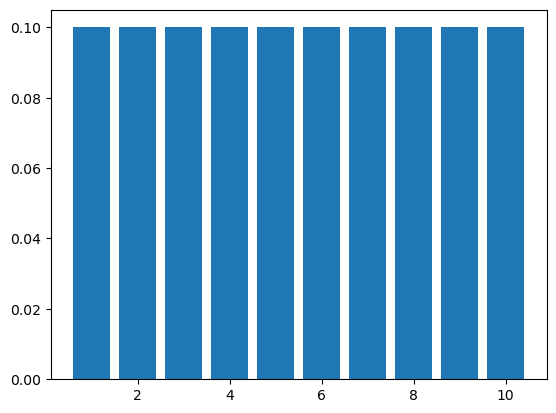

Media: 5.500000000000001
Entropía normalizada: 0.9999999999999998
Varianza: 8.25


In [22]:
X_4 = {1: 0.1, 2: 0.1, 3: 0.1, 4:0.1, 5:0.1, 6:0.1, 7:0.1, 8:0.1, 9:0.1, 10:0.1}
analize_VA(X_4)

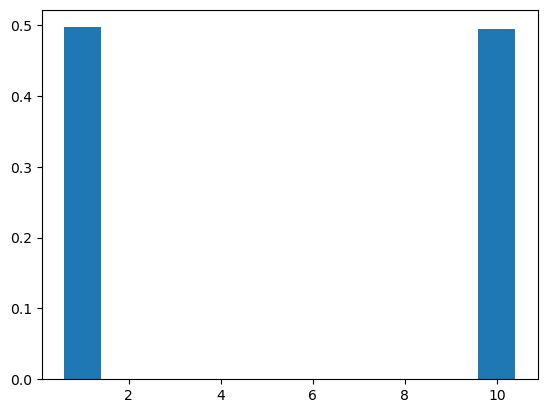

Media: 5.4910000000000005
Entropía normalizada: 0.32608130132741736
Varianza: 20.129919


In [23]:
X_5 = {1: 0.497, 2: 0.001, 3: 0.001, 4:0.001, 5:0.001, 6:0.001, 7:0.001, 8:0.001, 9:0.001, 10:0.495}
analize_VA(X_5)

La **varianza** indica qué tan alejado los datos. Si bien la entropía aumentará para mayor dispersión de datos, en realidad lo que indica es cuánta certeza puede haber respecto de del valor de una variable. Por eso, para el último ejemplo, si bien los valores se encuentran muy alejados, la entropía no es demasiada alta, ya que hay sólo dos valores posibles.

{1: 0.3, 2: 0.04, 3: 0.04, 4: 0.04, 5: 0.04, 6: 0.04, 7: 0.04, 8: 0.04, 9: 0.04, 10: 0.3}


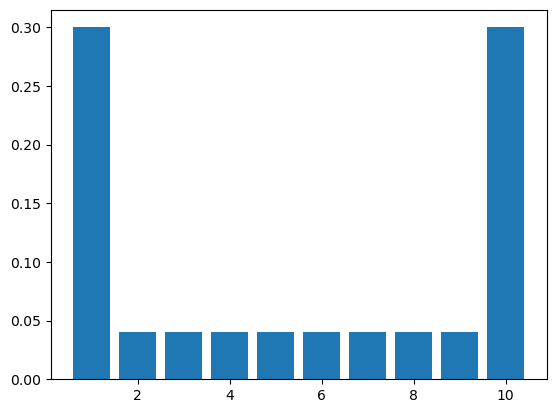

Media: 5.0600000000000005
Entropía normalizada: 0.7610680499432545
Varianza: 14.008111999999997


In [59]:
n = 10
v = 0.3 # Valor a asignar en los dos extremos de la distribución
X_6 = { i + 1: (1-2*v)/n for i in range(n)} # El resto se reparte en los demás valores
X_6[1] = v
X_6[n] = v
print(X_6)
analize_VA(X_6)

En este caso, donde la probabilidad es mayor a 0 para todos los valores de la variable, pero la mayoría se concentra en los dos valores extremos, la varianza disminuye respecto del ejemplo anterior, pero la entropía aumenta: Hay menor certeza del valor que puede tomar X

# Intuición de la entropía

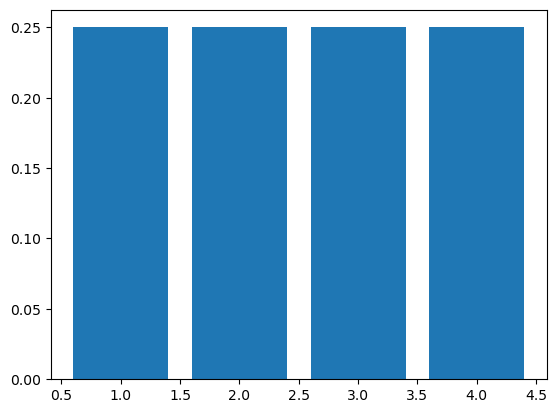

Media: 2.5
Entropía: 2.0
Varianza: 1.25


In [61]:
X = {1: 0.25, 2: 0.25, 3: 0.25, 4:0.25}
analize_VA(X, normalize=False)

*La entropía, si no está normalizada se suele expresar en base 2.*

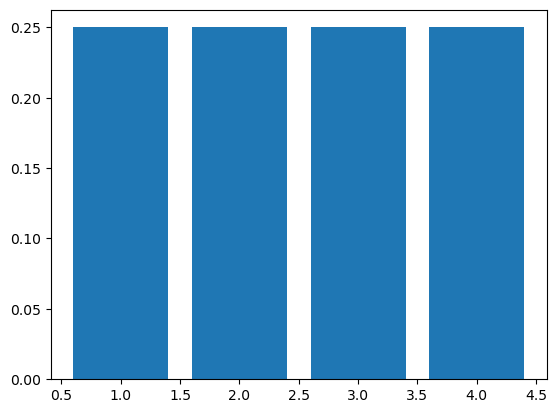

Media: 2.5
Entropía normalizada: 1.0
Varianza: 1.25


In [63]:
analize_VA(X, normalize=True)

Dado que realicé el experimento y tengo que adivinar cual fue la observación:

¿Cúal es la cantidad de preguntas promedio que deberia hacer para adivinar la salida?

Es mayor a 2.5?  
- si -> Es 3?  
- No -> Es 1?

Con dos preguntas encuentro resultado

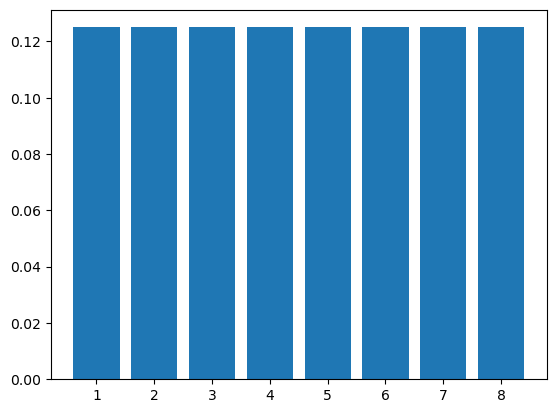

Media: 4.5
Entropía: 3.0
Varianza: 5.25


In [25]:
X = {1: 0.125, 2: 0.125, 3: 0.125, 4:0.125, 5: 0.125, 6: 0.125, 7: 0.125, 8:0.125}
analize_VA(X, normalize=False)

Es mayor a 4.5?
- si -> Es mayor a 6.5?:
    - Si -> es 7?
    - No -> es 5?
- no -> Es menor a 2.5?:
    - Si -> es 1?
    - No -> es 3?

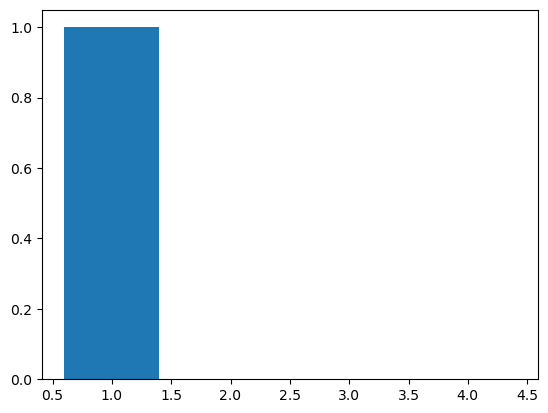

Media: 1.0000001385
Entropía: 1.0205288417267646e-06
Varianza: 3.134999890169505e-07


In [26]:
# Caso extremo:
X = {1: 0.99999999, 2: 0.0000000033, 3: 0.0000000033, 4: 0.000000033}
analize_VA(X, normalize=False)

Cuantas preguntas necesito hacer para adivinar?

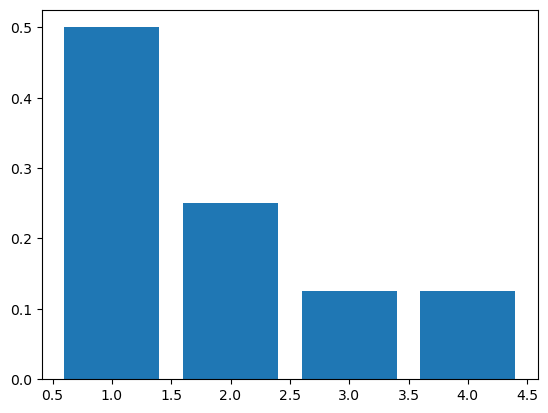

Media: 1.875
Entropía: 1.75
Varianza: 1.109375


In [27]:
X = {1: 0.5, 2: 0.25, 3: 0.125, 4:0.125}
analize_VA(X, normalize=False)

Es 1?
- Si -> Resuelto
- No -> Es 2?
    - Si -> Resuelto
    - No -> Es 3?
        - Si o No Resuelto

In [64]:
# Sumatoria de probabilidad multiplicada por la cantidad mínima de preguntas que necesito realizar en cada caso.
1 * 0.5 + 2 * 0.25 + 3 * 0.125 + 3 * 0.125

1.75

# Modelo generador de una V.A Categórica

In [65]:
X = {1: 0.1, 2: 0.3, 3: 0.5, 4:0.1}

In [66]:
X.keys(), X.values()

(dict_keys([1, 2, 3, 4]), dict_values([0.1, 0.3, 0.5, 0.1]))

In [67]:
observaciones = np.random.choice(list(X.keys()), size = 1000, p = list(X.values()))

In [68]:
observaciones

array([3, 2, 3, 2, 1, 3, 4, 3, 2, 4, 3, 1, 2, 3, 3, 3, 3, 3, 3, 1, 3, 2,
       2, 2, 2, 2, 3, 2, 4, 3, 1, 2, 3, 1, 3, 2, 3, 3, 3, 2, 2, 3, 1, 2,
       3, 4, 1, 2, 2, 2, 1, 2, 1, 3, 2, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 4,
       2, 1, 2, 2, 4, 4, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 4, 3,
       2, 1, 3, 3, 1, 3, 3, 3, 4, 2, 3, 3, 3, 3, 3, 2, 1, 3, 1, 3, 3, 2,
       2, 3, 3, 3, 3, 4, 4, 2, 3, 3, 3, 3, 1, 3, 1, 3, 3, 2, 3, 3, 2, 1,
       3, 3, 3, 4, 2, 3, 1, 4, 2, 2, 1, 3, 3, 3, 3, 2, 3, 3, 4, 3, 2, 2,
       1, 2, 2, 3, 3, 2, 4, 2, 3, 2, 4, 3, 2, 2, 3, 3, 1, 2, 3, 4, 3, 4,
       2, 2, 2, 2, 1, 2, 2, 3, 2, 3, 3, 3, 2, 3, 3, 2, 4, 3, 2, 3, 4, 3,
       4, 3, 2, 3, 3, 3, 2, 2, 3, 2, 3, 3, 3, 2, 2, 1, 3, 3, 3, 3, 3, 2,
       2, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 1, 4, 1, 1, 3, 1,
       2, 2, 1, 2, 4, 2, 3, 4, 3, 2, 2, 3, 3, 3, 3, 1, 3, 4, 1, 1, 2, 2,
       3, 4, 2, 3, 3, 2, 4, 1, 3, 4, 2, 3, 3, 3, 2, 1, 4, 3, 3, 4, 2, 2,
       3, 2, 3, 2, 4, 1, 2, 3, 1, 3, 3, 3, 3, 3, 3,

# Estimar la función de masa de probabilidad de las observaciones

In [77]:
from collections import Counter
Counter(observaciones)

Counter({3: 479, 2: 321, 1: 110, 4: 90})

Histograma

In [85]:
np.histogram(observaciones, bins = 4, range = [1,5])
# bins indica la cantidad de intervalos
# range indica el valor mínimo y el máximo. Sino usa por defecto el mínimo y el máximo de los 
# valores proporcionados (observaciones), que no necesariamente son el mínimo y máximo posibles.

(array([110, 321, 479,  90]), array([1., 2., 3., 4., 5.]))

In [72]:
np.histogram(observaciones, bins=4, range=[1,5])

(array([110, 321, 479,  90]), array([1., 2., 3., 4., 5.]))

Tener en cuenta que toma como primer intervalo [1, 2), como segundo [2,3), y asi hasta el ultimo [4, 5)

donde "[" es incluido y ")" es excluido

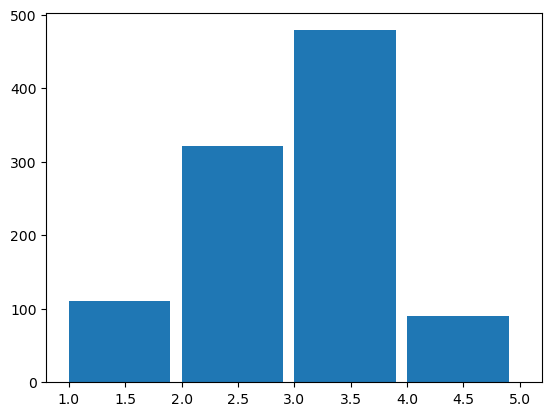

In [88]:
hist = plt.hist(observaciones, bins=4, range=[1,5], width=0.9, density=False) #normed='density')
plt.show()

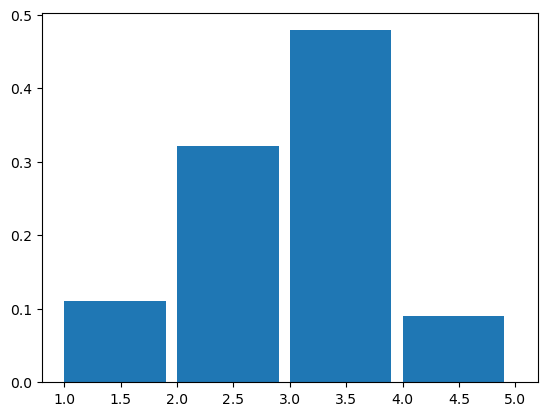

In [90]:
# Normalizado (valores entre 0 y 1)
hist = plt.hist(observaciones, bins=4, range=[1,5], width=0.9, density=True)
plt.show()

In [74]:
hist

(array([0.11 , 0.321, 0.479, 0.09 ]),
 array([1., 2., 3., 4., 5.]),
 <a list of 4 Patch objects>)

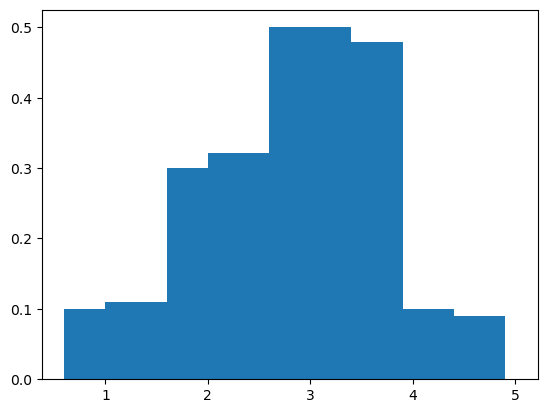

Media: 2.6
Entropía normalizada: 0.8427376486136672
Varianza: 0.64


In [75]:
# Esta es la Ground Truth
analize_VA(X)

Counter({2: 47, 3: 33, 1: 11, 4: 9})


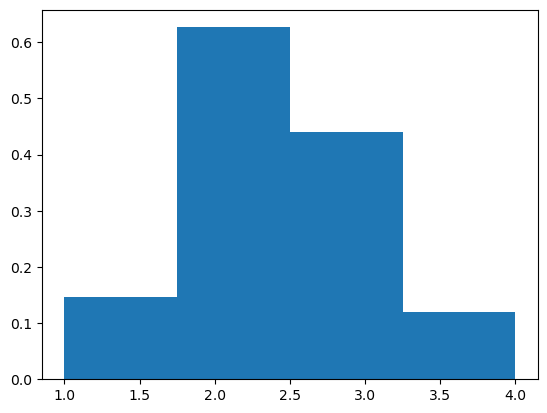

(array([0.14666667, 0.62666667, 0.44      , 0.12      ]), array([1.  , 1.75, 2.5 , 3.25, 4.  ]), <a list of 4 Patch objects>)


In [139]:
def estimate(X, hist_bins, hist_range, n = 1000):
    sample = np.random.choice(list(X.keys()), n, p = list(X.values()))
    print(Counter(sample))
    hist = plt.hist(sample, bins = hist_bins, range = hist_range, density=True)
    plt.show()
    print(hist)
                              
estimate(X, n= 100, hist_bins = 4, hist_range = [1,4])

Counter({3: 4957, 2: 3033, 4: 1021, 1: 989})


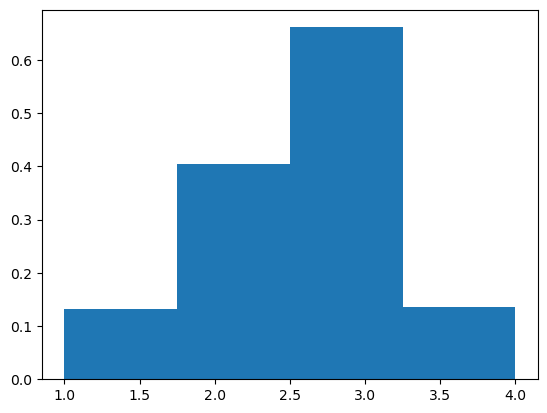

(array([0.13186667, 0.4044    , 0.66093333, 0.13613333]), array([1.  , 1.75, 2.5 , 3.25, 4.  ]), <a list of 4 Patch objects>)


In [138]:
estimate(X, n = 10000, hist_bins = 4, hist_range = [1,4])

A mayor cantidad de observaciones, más se parece el sampleo al valor real (ground truth)